 
# <div style="text-align: center; background-color:turquoise; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Product Shipping Importance Prediction</div> 

## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">A. About dataset</div>

Columns names:

1. ID:
    It is a numerical column.
    Each product has its own unique id.
2. Warehouse_block::
    It is a categorical column.
    The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
3. Mode of shipment:
    It is a categorical column.
    The Company Ships the products in multiple way such as Ship, Flight and Road.
4. Customer care calls:
    It is a numerical column.
    The number of calls made from enquiry for enquiry of the shipment.
5. Customer rating:
    It is a numerical column.
    The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product:
    It is a numerical column.
    Cost of the Product in US Dollars.
7. Prior purchases:
    It is a numerical variable.
    The Number of Prior Purchase.
8. Product importance:
    It is a categorical column.
    The company has categorized the product in the various parameter such as low, medium, high.
    
9. Gender:
    It is a categorical column.
    Male and Female.
10. Discount offered:
    It is a numerical column.
    Discount offered on that specific product.
11. Weight in gms:
    It is a numerical column.
     It is the weight in grams.
12. Reached on time:
    It is a numerical column.
    It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
    It is our target variable.
    

## Business Scope

The business scope for the Shipping Dataset involves developing a robust machine learning model to accurately predict whether the product that is shipped reached to customer on time or not. The application of this predictive model aims to optimize shipping system, improve on the basis of customer feedback, and contribute to wellbeing of our shipping company. This initiative aims for timely reach of each product to customer. The success of the project will be measured by the model's accuracy, precision, recall.

## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">B. Data Cleaning and Preprocessing

## Preprocessing Techniques

- The dataset used for the preprocessing is Shipping Dataset.
- Starting with importing libraries
- Dropping irrelevant feature
- Identifying the features and target variable
- Separating features and target
- Checking for missing values
- Checking for unique values
- Label encoding categorical data
- One hot encoding remaining categorical data
- Splitting data
- Feature scaling

#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv("shipping.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
#Dropping last column as I do not know what this column is indicating
df=df.drop('ID',axis=1)
df.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [5]:
#separating X and y
X=df.iloc[:,:-1].values
y=df.iloc[:,10].values
X[0:5],y[0:5]

(array([['D', 'Flight', 4, 2, 177, 3, 'low', 'F', 44, 1233],
        ['F', 'Flight', 4, 5, 216, 2, 'low', 'M', 59, 3088],
        ['A', 'Flight', 2, 2, 183, 4, 'low', 'M', 48, 3374],
        ['B', 'Flight', 3, 3, 176, 4, 'medium', 'M', 10, 1177],
        ['C', 'Flight', 2, 2, 184, 3, 'medium', 'F', 46, 2484]],
       dtype=object),
 array([1, 1, 1, 1, 1], dtype=int64))

In [6]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 0]= labelEncoder_X.fit_transform(X[:, 0])
X[:, 1]= labelEncoder_X.fit_transform(X[:, 1])
X[:, 6]= labelEncoder_X.fit_transform(X[:, 6])
X[:, 7]= labelEncoder_X.fit_transform(X[:, 7])
X[0:3],y[0:5]


(array([[3, 0, 4, 2, 177, 3, 1, 0, 44, 1233],
        [4, 0, 4, 5, 216, 2, 1, 1, 59, 3088],
        [0, 0, 2, 2, 183, 4, 1, 1, 48, 3374]], dtype=object),
 array([1, 1, 1, 1, 1], dtype=int64))

In [7]:
a=df["Warehouse_block"].unique()
print(a)
print(df["Mode_of_Shipment"].unique())
print(df["Product_importance"].unique())
print(df["Gender"].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [8]:
#performing one hot encoding
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("one",OneHotEncoder(),[0,1,6])],remainder="passthrough")
X = ct.fit_transform(X)
X[0:5]

array([[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4, 2, 177,
        3, 0, 44, 1233],
       [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4, 5, 216,
        2, 1, 59, 3088],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2, 2, 183,
        4, 1, 48, 3374],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3, 3, 176,
        4, 1, 10, 1177],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2, 2, 184,
        3, 0, 46, 2484]], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
#CHECK FOR TRAIN TEST SPLIT RATIO
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [10]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
print(X_train[0:2])
X_test = sc_X.transform(X_test)
print(X_test[0:2])

[[-0.44382429 -0.45095935  2.26816072 -0.45241835 -0.70783016 -0.43664981
  -0.4360962   0.68587253 -0.30591972 -0.97142746  1.15389711  1.69839981
  -1.40815724 -2.21230675  0.28747556 -0.98477326  0.5745969  -1.33644911]
 [-0.44382429  2.21749478 -0.44088586 -0.45241835 -0.70783016  2.29016473
  -0.4360962  -1.45799687 -0.30591972 -0.97142746  1.15389711  1.69839981
  -1.40815724  1.73173243  0.95051551 -0.98477326 -0.40081759 -1.57427641]]
[[ 2.25314391 -0.45095935 -0.44088586 -0.45241835 -0.70783016  2.29016473
  -0.4360962  -1.45799687 -0.30591972 -0.97142746  1.15389711  0.82293292
  -0.69940678  0.62573203 -1.03860435  1.01546218 -0.58370781  0.49604078]
 [-0.44382429 -0.45095935 -0.44088586 -0.45241835  1.41276827  2.29016473
  -0.4360962  -1.45799687 -0.30591972  1.02941294 -0.8666284   1.69839981
   0.71809414  0.77180755  0.28747556 -0.98477326 -0.70563462 -1.40718749]]


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">C. Exploratory Data Analysis (EDA)

- Central tendency measures the center of a data set. Common measures include: <br> Mean: The average of all data points. Median: The middle value when the data points are sorted. Mode: The most frequently occurring value.
- Dispersion measures the spread of data points around the center. Common measures include: <br> Range: The difference between the maximum and minimum values. Variance: The average of the squared differences from the mean.
  Deviation: The square root of the variance, indicating how much the data points deviate from the mean.
- Correlation measures the strength and direction of the linear relationship between two variables.

In [12]:
# In-depth Data Analysis
central_tendency_mean = df[['Customer_care_calls', 'Customer_rating']].mean()
central_tendency_median = df[['Customer_care_calls', 'Customer_rating']].median()
central_tendency_mode = df[['Customer_care_calls', 'Customer_rating']].mode()
dispersion = df[['Customer_care_calls', 'Customer_rating']].std()
correlation = df[['Customer_care_calls', 'Customer_rating']].corr()

print("Central Tendency_mean: \n", central_tendency_mean)
print("Central Tendency_median: \n", central_tendency_median)
print("Central Tendency_mode: \n", central_tendency_mode)
print("-----------------------------")
print("Dispersion: \n", dispersion)
print("-----------------------------")
print("Correlation: \n", correlation)


Central Tendency_mean: 
 Customer_care_calls    4.054459
Customer_rating        2.990545
dtype: float64
Central Tendency_median: 
 Customer_care_calls    4.0
Customer_rating        3.0
dtype: float64
Central Tendency_mode: 
    Customer_care_calls  Customer_rating
0                    4                3
-----------------------------
Dispersion: 
 Customer_care_calls    1.141490
Customer_rating        1.413603
dtype: float64
-----------------------------
Correlation: 
                      Customer_care_calls  Customer_rating
Customer_care_calls             1.000000         0.012209
Customer_rating                 0.012209         1.000000


A correlation coefficient of 0.012209 between two columns indicates a very weak positive linear relationship between the two variables.

In [13]:
df.groupby(['Product_importance'])['Cost_of_the_Product'].sum().reset_index()

,Product_importance,Cost_of_the_Product
0,high,193270
1,low,1123281
2,medium,995404


In [14]:
df.groupby(['Mode_of_Shipment'])['Cost_of_the_Product'].sum().reset_index()

,Mode_of_Shipment,Cost_of_the_Product
0,Flight,371938
1,Road,370437
2,Ship,1569580


In [17]:
# Advanced Grouping and Aggregation
grouped_df = df.groupby('Warehouse_block').agg({'Customer_care_calls': 'mean', 'Customer_rating': 'mean','Reached.on.Time_Y.N': 'mean'})
grouped_df

,Customer_care_calls,Customer_rating,Reached.on.Time_Y.N
Warehouse_block,,,
A,4.038189,2.957447,0.586470
B,4.020185,2.980360,0.602291
C,4.064921,2.993999,0.596836
D,4.053435,3.017993,0.597601
F,4.075014,2.996727,0.598472


In [19]:
# Descriptive Statistics
stats = df.describe()

stats

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">D. Data Visualization

- Histogram
- Box Plot
- Scatter Plot
- Correlation Matrix

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

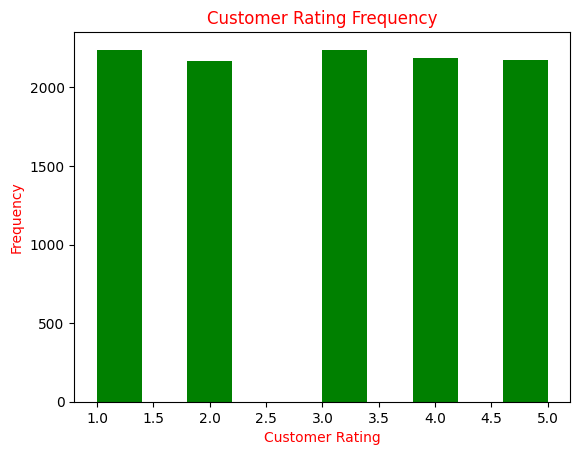

In [35]:
plt.hist(df['Customer_rating'], color="green")
plt.title('Customer Rating Frequency',color="red")
plt.xlabel('Customer Rating',color="red")
plt.ylabel('Frequency',color="red")
plt.show()

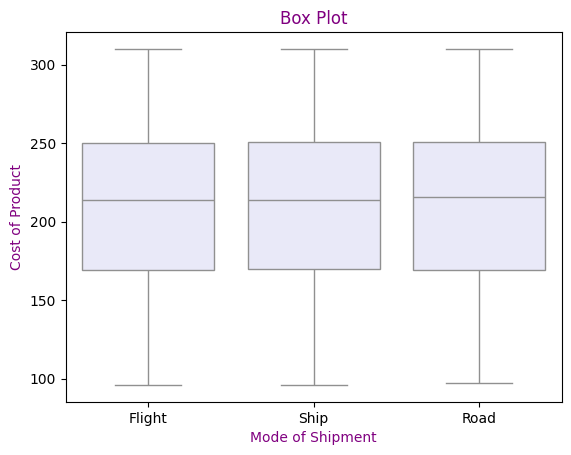

In [33]:
sns.boxplot(x=df['Mode_of_Shipment'], y=df['Cost_of_the_Product'],color="lavender")
plt.title('Box Plot',color="purple")
plt.xlabel("Mode of Shipment",color="purple")
plt.ylabel("Cost of Product",color="purple")
plt.show()

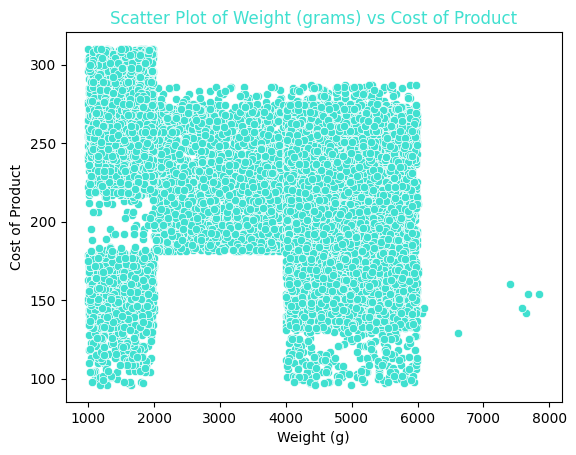

In [41]:
sns.scatterplot(x='Weight_in_gms', y='Cost_of_the_Product', data=df,color="turquoise")
plt.title('Scatter Plot of Weight (grams) vs Cost of Product',color="turquoise")
plt.xlabel('Weight (g)')
plt.ylabel('Cost of Product')
plt.show()

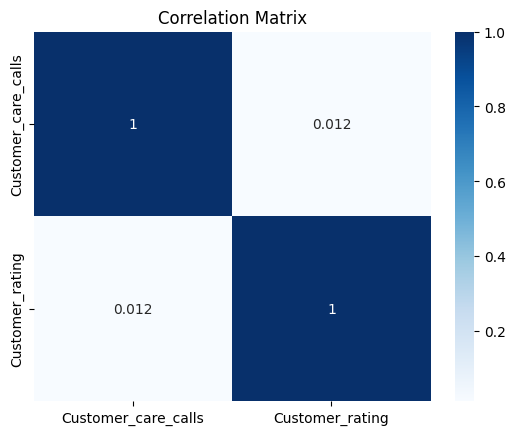

In [51]:
sns.heatmap(correlation,annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">E. Hypothesis Testing


### Hypothesis 1:

- Null Hypothesis (H0): There is no significant difference in weight between mode of shipment.

- Alternative Hypothesis (H1): There is a significant difference in weight between mode of shipment.








In [53]:
from scipy.stats import f_oneway

# Extract the weights for each shipping mode
weights_flight = df[df['Mode_of_Shipment'] == 'Flight']['Weight_in_gms']
weights_ship = df[df['Mode_of_Shipment'] == 'Ship']['Weight_in_gms']
weights_road = df[df['Mode_of_Shipment'] == 'Road']['Weight_in_gms']

# Perform one-way ANOVA
f_stat, p_val = f_oneway(weights_flight, weights_ship, weights_road)

print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("There is a significant difference in weight between different shipping modes.")
else:
    print("There is no significant difference in weight between different shipping modes.")


F-statistic: 0.09566633784305321
p-value: 0.9087679430733757
There is no significant difference in weight between different shipping modes.


### Hypothesis 2:

- Null Hypothesis (H0): There is no significant difference in customer rating between genders.

- Alternative Hypothesis (H1): There is a significant difference in customer rating between genders.







In [54]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(df[df['Gender'] == 'F']['Customer_rating'],
                          df[df['Gender'] == 'M']['Customer_rating'])

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in customer rating between genders.")
else:
    print("There is no significant difference in customer rating between genders.")


t-statistic: -0.290983505660064
p-value: 0.7710694221041373
There is no significant difference in customer rating between genders.


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">F. Advanced Analysis

<font size="5">Model Building</font>
<br>
<font size="4"><center><b>Logistic Regression</b></center></font>

In [55]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [56]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[523 385]
 [417 875]]


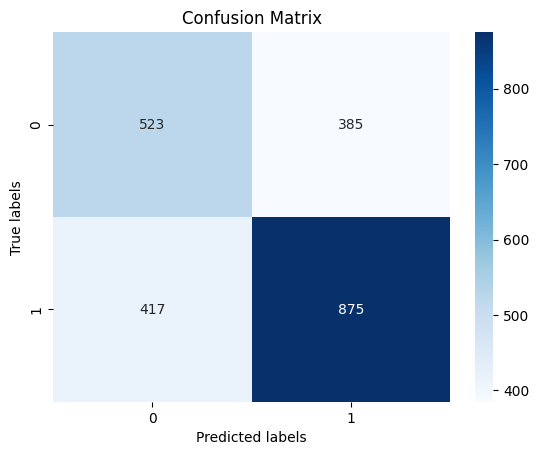

In [57]:
#Plot confusion matrix
import seaborn as sns 
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
#compute precision,recall,accuracy byusing confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
print("preision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)

preision: 0.5563829787234043
recall: 0.5759911894273128
accuracy: 0.6354545454545455


<font size="4"><center><b>Random Forest</b></center></font>

In [63]:
#apply random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [64]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[647 261]
 [485 807]]


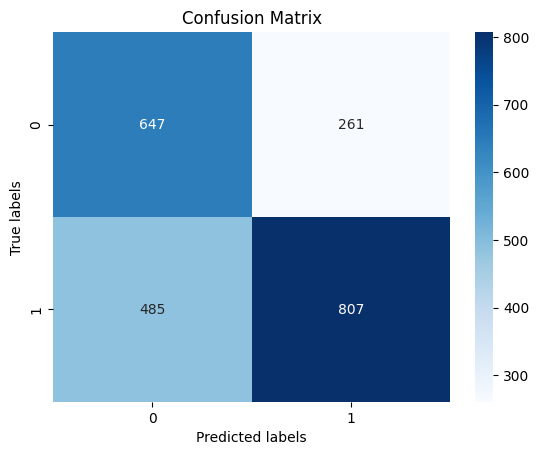

In [65]:
#Plot confusion matrix
import seaborn as sns 
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
#compute precision,recall,accuracy byusing confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
print("preision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)

preision: 0.5715547703180212
recall: 0.7125550660792952
accuracy: 0.6609090909090909


<font size="4"><center><b>SVM</b></center></font>

In [82]:
#applying svm linear
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_test[0:10],y_pred[0:10]

(array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64))

In [83]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[607 301]
 [482 810]]


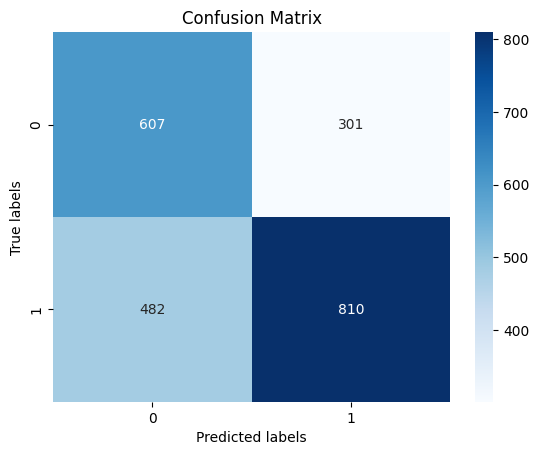

In [84]:
#Plot confusion matrix
import seaborn as sns 
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [85]:
#compute precision,recall,accuracy byusing confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
print("preision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)

preision: 0.5573921028466483
recall: 0.6685022026431718
accuracy: 0.644090909090909


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Conclusion

By comparing models it is clear that random forest is working best.

Analysis 
- Precision (0.5716): Approximately 57.16% of the instances predicted as positive are actually positive. This indicates that there are some false positives.
- Recall (0.7126): Approximately 71.26% of the actual positive instances are correctly identified. This shows that the model is relatively good at identifying positive cases but may miss some.
- Accuracy (0.6609): Approximately 66.09% of the overall predictions are correct. This shows the model's general performance but does not differentiate between the different types of errors.